In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# 0 Other settings

## 1 Set the color

In [36]:
COLOR = "#000000"

## 2 Set the font

In [31]:
def Load_style():
    try:
        plt.style.use("chartlab.mplstyle")
    except:
        pass
    font_path = '/usr/share/fonts/truetype/Times New Roman.ttf'
    font = FontProperties(fname=font_path, size=16)
    plt.rcParams['font.sans-serif'] = [font.get_name()]
    plt.rcParams["axes.unicode_minus"]= False
    # Sets the global font color
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    return font


def Load_style2():
    font_path = '/usr/share/fonts/truetype/SimHei.ttf'
    return FontProperties(fname=font_path, size=14)

# 1 Get the data

## 1.1 Calculate SSE

In [4]:
def compute_sse(mols, n_init=50):
    # Initialize ring information
    index_ = 0
    for mol in mols:
        try:
            Chem.GetSymmSSSR(mol)
        except:
            pass
    mols = [mol for mol in mols if mol is not None]
    # Generate molecular fingerprints
    fingerprints_mols = [GetMorganFingerprintAsBitVect(mol_, radius=2, nBits=2048) for mol_ in mols]
    # Convert fingerprints to NumPy arrays for easy computation and clustering
    fp_array_mols = np.array([list(fp) for fp in fingerprints_mols])  # Convert fingerprints to binary vector form

    # Use the elbow rule to determine the optimal number of clusters
    sse = []
    for k in range(1, n_init+1):  # Test 1 to 50 clusters
        kmeans = KMeans(n_clusters=k, n_init=n_init, random_state=42)
        kmeans.fit(fp_array_mols)
        sse.append(kmeans.inertia_)  # Sum of squares of errors within clusters
    return sse, fp_array_mols

## 1.2 Obtain the B-plot data

In [ ]:
def get_B_data():
    smiles_list = [
        'CC=C/C=C/CC', 'Clc1ccc(Cl)c(Cl)c1', 'c1ccc2ccc3cccc4ccc1c2c34', 'CCNc1ccc2c(c1)Cc1ccccc1-2', 'CC(=O)c1cc2ccccc2s1', 
        'Nc1ccc2ccccc2c1', 'c1cc2ccc3cccc4ccc(c1)c2c34', 'COc1ccc2c(c1)Oc1cc(O)ccc1[C@@]21OC(=O)c2ccccc21', 'CCOc1ccc2ccc(=O)oc2c1', 'COc1ccc2ccc(=O)oc2c1', 
        'COc1ccc2c(c1)CC[C@@H]1[C@@H]2CC[C@@]2(C)[C@H](O)CC[C@@H]12', 'Cc1c[nH]c2ccccc12', 'Nc1ccc(-c2ccccc2)cc1', 'COc1ccc([N+])cc1', 'c1cc2cccc3ccc4cccc1c4c32', 
        'Cc1cc2ccccc2c2ccc3ccccc3c12', 'Nc1cc2c3ccccc3ccc2c2ccccc12', 'O=[N+]([O-])c1cccc2ccccc12', 'Cc1cc2c3ccccc3ccc2c2ccccc12', 'CCCCOc1ccc2c(C)cc(=O)oc2c1', 
        'c1ccc(COc2ccc3cccnc3c2)cc1', 'O=CCCCNCCCCOCc1ccccc1', 'CCOc1ccc2ccc(=O)oc2c1', 'CCOc1ccc2nc3ccc(=O)cc-3oc2c1', 'CCCCCc1cc(O)c2c(c1)OC(C)(C)cc2', 
        'COc1ccc2ccc(=O)oc2c1', 'COc1ccc2nc3ccc(=O)cc-3oc2c1', 'CCCCCOc1ccc2nc3ccc(=O)cc-3oc2c1', 'Cc1c2ccccc2nc2c1ccc1ccccc12', 'C(C)/C=C/C=C(C)\\C=C\\C=CC', 
        'CCCCCc1cc(O)c2c(c1)OC(C)(C)[C@@H]1[C@@H](O)C=C(C)C[C@@H]21', 'O=c1cc(C(F)(F)F)c(CCCOCCCC)co1', 'CCCCNCc1cc(=O)oc2cc(OC)ccc12', 'Nc1nc(-c2ccccc2)c(Br)c(=O)[nH]1', 'N1c2ccccc2C=Cc2ccccc21', 
        'c1ccncc1(CC(Cl)CC(N)(O))', 'Oc1ccc(OC(F)(F)F)cc1', 'COc1ccc(OC(F)(F)F)cc1CN', 'c1ccc2c(c1)ccc1nc3ccc4ccccc4c3cc12', 'CCN(CC)C(=S)S', 
        'Cc1c2ccccc2c(C)c2c1ccc1ccccc12', 'Cc1ccc2c(=O)c3cccc(CC(=O)O)c3oc2c1C', 'CCNCc1cc(=O)oc2cc(OC)ccc12', 'Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1', 'COc1cccc(OC)c1', 
        'O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12', 'Cn1c(N)ncc1', 'COC(OC)[C@@]1(C)Oc2ccc(N)cc2[C@H](N(C))[C@H]1O'
    ]
    smiles_number = [63, 11, 6, 1, 1, 9, 6, 1, 12, 22, 1, 21, 2, 1, 6, 1, 2, 52, 1, 6, 29, 4, 12, 2, 1, 22, 5, 1, 1, 6, 2, 8, 1, 1, 1, 1, 2, 6, 1, 1, 1, 2, 3, 2, 18, 2, 4, 1]
    return smiles_list, smiles_number

## 1.3 Obtain the C-graph data

In [20]:
def get_C_data(fp_array_mols):
    n_samples = len(fp_array_mols)
    n_features = 1024       # Feature dimensionality
    n_clusters = 15
    # divided
    X, _ = make_blobs(n_samples=len(fp_array_mols), n_features=n_features, centers=fp_array_mols, random_state=42)
    # Dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    fp_tsne = tsne.fit_transform(X)
    # clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=2, random_state=42)
    kmeans.fit(fp_tsne)  # Train the model
    labels = kmeans.labels_     # Get clustering results
    return fp_tsne, labels

In [33]:
def draw_A(ax, data, text_location=(-0.10, 1.1), fontsize=18, name='A.'):
    """"""
    font = Load_style()
    font2 = Load_style2()
    ax2 = ax.twinx()
    max_SSE = 0
    bar_height = [0]
    # Set the x-axis label
    for index, value in enumerate(data[:-1]):
        bar_value = abs(data[index + 1] - value)
        bar_value = round(bar_value, 1)
        bar_height.append(bar_value)
        if bar_value > max_SSE: max_SSE = bar_value
    # Set the value label
    texs = [f'{index}' for index in range(len(bar_height))]
    ax.text(text_location[0], text_location[1], name[:2], transform=ax.transAxes,
                       fontproperties=font, fontsize=fontsize+2, ha='left', va='center')
    # Set the axis label
    ax.set_xlabel('Number of clusters', fontsize=fontsize, fontweight='bold', fontproperties=font)
    ax.set_ylabel('SSE (red point)', fontsize=fontsize, fontweight='bold', fontproperties=font)
    ax2.set_xlabel('Number of clusters', fontsize=fontsize, fontweight='bold', fontproperties=font)
    ax2.set_ylabel('△SSE (blue bar)', fontsize=fontsize, fontweight='bold', fontproperties=font2)

    # Draw an elbow diagram
    ax.plot(range(0, len(data)), data, marker='o', label='SSE', c='#FF0000')
    # Draw a histogram
    bars = ax2.bar(texs, bar_height, color='#0000FF', alpha=0.5)
    # Sets the axis range
    x_ticks = [i for i in range(len(data)+5) if i % 10 == 0]
    ax.set_xticks(ticks=x_ticks, labels=[str(i) for i in x_ticks])
    ax2.set_ylim([0, max_SSE + 100])
    ax2.set_ylim(0, max(bar_height) * 1.1 + 1) 

In [34]:
def draw_B(ax, data, text_location=(-0.10, 1.1), fontsize=18, name='B.'):
    """"""
    font = Load_style()
    font2 = Load_style2()
    ax2 = ax.twinx()
    max_SSE = 0
    bar_height = [0]
    # Set the x-axis label
    for index, value in enumerate(data[:-1]):
        bar_value = abs(data[index + 1] - value)
        bar_value = round(bar_value, 1)
        bar_height.append(bar_value)
        if bar_value > max_SSE: max_SSE = bar_value
    # Set the value label
    texs = [f'{index}' for index in range(len(bar_height))]
    ax.text(text_location[0], text_location[1], name[:2], transform=ax.transAxes,
                       fontproperties=font, fontsize=fontsize+2, ha='left', va='center')
    # Set the axis label
    ax.set_xlabel('Number of clusters', fontsize=fontsize, fontweight='bold', fontproperties=font)
    ax.set_ylabel('SSE (red point)', fontsize=fontsize, fontweight='bold', fontproperties=font)
    ax2.set_xlabel('Number of clusters', fontsize=fontsize, fontweight='bold', fontproperties=font)
    ax2.set_ylabel('△SSE (blue bar)', fontsize=fontsize, fontweight='bold', fontproperties=font2)
    # Draw an elbow diagram
    ax.plot(range(0, len(data)), data, marker='o', label='SSE', c='#FF0000')
    # Draw a histogram
    bars = ax2.bar(texs, bar_height, color='#0000FF', alpha=0.5)
    # Sets the axis range
    x_ticks = [i for i in range(len(data)+5) if i % 10 == 0]
    print("x_ticks =", x_ticks)
    ax.set_xticks(ticks=x_ticks, labels=[str(i) for i in x_ticks])
    ax.set_ylim(0, 6000)
    ax2.set_ylim([0, max_SSE + 100])
    ax2.set_ylim(0, max(bar_height) * 1.1 + 1)  # The secondary y-axis range, plus 1 to ensure the histogram is visible

In [8]:
def draw_C(ax, data, text_location=(-0.10, 1.1), labels=None, custom_labels=None, fontsize=18, name='C.'):
    """"""
    import seaborn as sns
    font = Load_style()
    # Define custom string labels
    if custom_labels is None:
        custom_labels = []
        for i in range(len(data)):
            custom_labels.append(f'{i}')
    ax.text(text_location[0], text_location[1], name[:2], transform=ax.transAxes,
            fontproperties=font, fontsize=fontsize+2, ha='left', va='center')
    sns.scatterplot(
        x=data[:, 0], y=data[:, 1],
        hue=labels,
        palette=sns.color_palette("hsv", n_colors=len(custom_labels)),
        legend='full', ax=ax)
    # Get legend handles and labels
    handles, _ = ax.get_legend_handles_labels()
    # Update the legend labels
    ax.legend(handles, custom_labels, loc=5, bbox_to_anchor=(1.25, 0.5), ncol=1)
    # plt.title('T-SNE')
    ax.set_xlabel('t-SNE 1', fontsize=fontsize, fontproperties=font)
    ax.set_ylabel('t-SNE 2', fontsize=fontsize, fontproperties=font)

In [12]:
filePath = '../data/merged.sdf'
mols_ = Chem.SDMolSupplier(filePath)
mols_ = [mol_ for mol_ in mols_ if mol_ is not None]
sseA_, fp_array_molsA_ = compute_sse(mols=mols_, n_init=50)

[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerator
[17:22:09] DEPRECATION WARNING: please use MorganGenerat

In [26]:
sseA_

[21761.814705882363,
 21221.57624981457,
 20762.55049516694,
 20387.73059512209,
 20167.590844410333,
 19954.598251337386,
 19757.013061423688,
 19510.978715994144,
 19384.594598446558,
 19294.535166545033,
 19047.303655066047,
 18993.827235816225,
 18847.445600620093,
 18755.55164480126,
 18569.865061098582,
 18442.77409851325,
 18250.593857743792,
 18258.95796369261,
 18122.53068921003,
 17886.1721587466,
 17770.977314065094,
 17643.91065002907,
 17451.87534398585,
 17453.46594298488,
 17381.795378681887,
 17193.706083429755,
 17115.809780315238,
 17129.297557542635,
 16975.243557003945,
 16853.64639445908,
 16680.92949417202,
 16577.547722313615,
 16629.99578926632,
 16473.901960373893,
 16359.952455264733,
 16310.391968041444,
 16201.816644447379,
 16104.53318959756,
 15985.546617706503,
 15953.83708569711,
 15804.877607264603,
 15846.900633833036,
 15751.879477555869,
 15560.857477562091,
 15544.144966840402,
 15442.580676586085,
 15466.720699377343,
 15294.209063476363,
 15206.25

In [16]:
molsList = []
smilesList_, smilesNumber_ = get_B_data()
for index_ in range(len(smilesList_)):
    mol_ = Chem.MolFromSmiles(smilesList_[index_])
    Chem.GetSymmSSSR(mol_)
    list_ = [mol_] * smilesNumber_[index_]
    molsList.extend(list_)
sseB_, fp_array_molsB_ = compute_sse(molsList)

[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerator
[17:28:01] DEPRECATION WARNING: please use MorganGenerat

In [27]:
sseB_

[5953.419178082182,
 4825.554788484141,
 3806.0229298137997,
 3135.951037360332,
 2578.6678463094013,
 2282.0948488933864,
 2035.8704044489373,
 1830.2383023839698,
 1645.6305550475945,
 1503.4397888955073,
 1374.9735935795545,
 1253.2203933747421,
 1142.0530428174973,
 1032.9458999603537,
 932.8087870732417,
 846.7912184931728,
 768.2669023837502,
 694.6518327686804,
 634.390963203463,
 573.6206797235021,
 516.7607849326599,
 460.86302759740283,
 420.58921807359326,
 386.08921807359326,
 351.91497564935077,
 318.21151244588754,
 286.937702922078,
 256.68229166666663,
 226.6513392857143,
 196.6171287593985,
 174.6171287593985,
 151.9765037593985,
 129.7265037593985,
 113.84078947368421,
 94.76817042606514,
 77.81578947368422,
 60.88245614035088,
 49.81578947368421,
 39.16666666666667,
 28.16666666666667,
 20.166666666666668,
 12.666666666666668,
 6.666666666666668,
 1.2542464541724628e-27,
 1.2544748670188388e-27,
 1.1953535603286387e-27,
 1.2233012353082523e-27,
 1.1956087755746881e-2

In [21]:
fp_tsne_, labels_ = get_C_data(fp_array_molsA_)

In [28]:
fp_tsne_

array([[ 3.685986  ,  0.7011329 ],
       [-2.4693933 , -1.6036723 ],
       [-0.02043093,  1.25045   ],
       ...,
       [ 3.745931  ,  0.15381393],
       [-0.7222247 ,  2.096446  ],
       [-2.8257322 , -0.4135377 ]], dtype=float32)

In [29]:
labels_

array([ 3, 12,  1,  1,  0,  8,  0, 14, 14,  3,  8, 10,  8, 10, 11,  0,  8,
        7,  1,  3,  5,  4, 12,  1,  7,  7,  6,  8,  2,  2,  8,  5,  5,  7,
        0,  8,  1,  6,  2,  9,  3, 10, 14,  1,  3,  6,  8,  8,  1, 12,  4,
        0,  9,  3,  2,  1,  1,  4, 13, 13,  4, 10, 12,  8,  9,  2,  3,  2,
        5,  7,  6,  7, 13,  3,  7,  0, 11,  8,  3,  7, 11,  6,  0, 12, 14,
       14,  0, 13, 13, 12, 14, 10,  4,  8,  7,  1,  5, 10,  4,  3,  9,  2,
        0, 13, 14,  6,  9,  7, 12,  1, 10,  4,  5,  2,  9,  2, 11, 11,  7,
        0, 11, 10,  7,  0,  8, 13,  9,  8,  8,  3,  0,  8,  1,  2,  4,  4,
        1, 12, 12,  0, 11,  0,  8,  7,  1,  9, 13,  6, 12, 10,  4, 10,  9,
        7,  4,  7,  1,  1,  6, 12,  4, 12, 10,  0,  7, 11, 13,  2,  2,  5,
       10,  8, 12,  6,  6, 11,  0, 13,  2,  7, 10,  3,  8, 12, 10,  0,  0,
        7, 13, 11,  8,  8,  8,  0,  1,  8,  0,  3,  2,  4, 11,  9, 12, 14,
       13, 10, 11,  8, 13,  6,  4,  7, 13,  0,  5, 13,  9,  5,  1, 11,  1,
        6,  8,  0,  0,  9

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

x_ticks = [0, 10, 20, 30, 40, 50]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

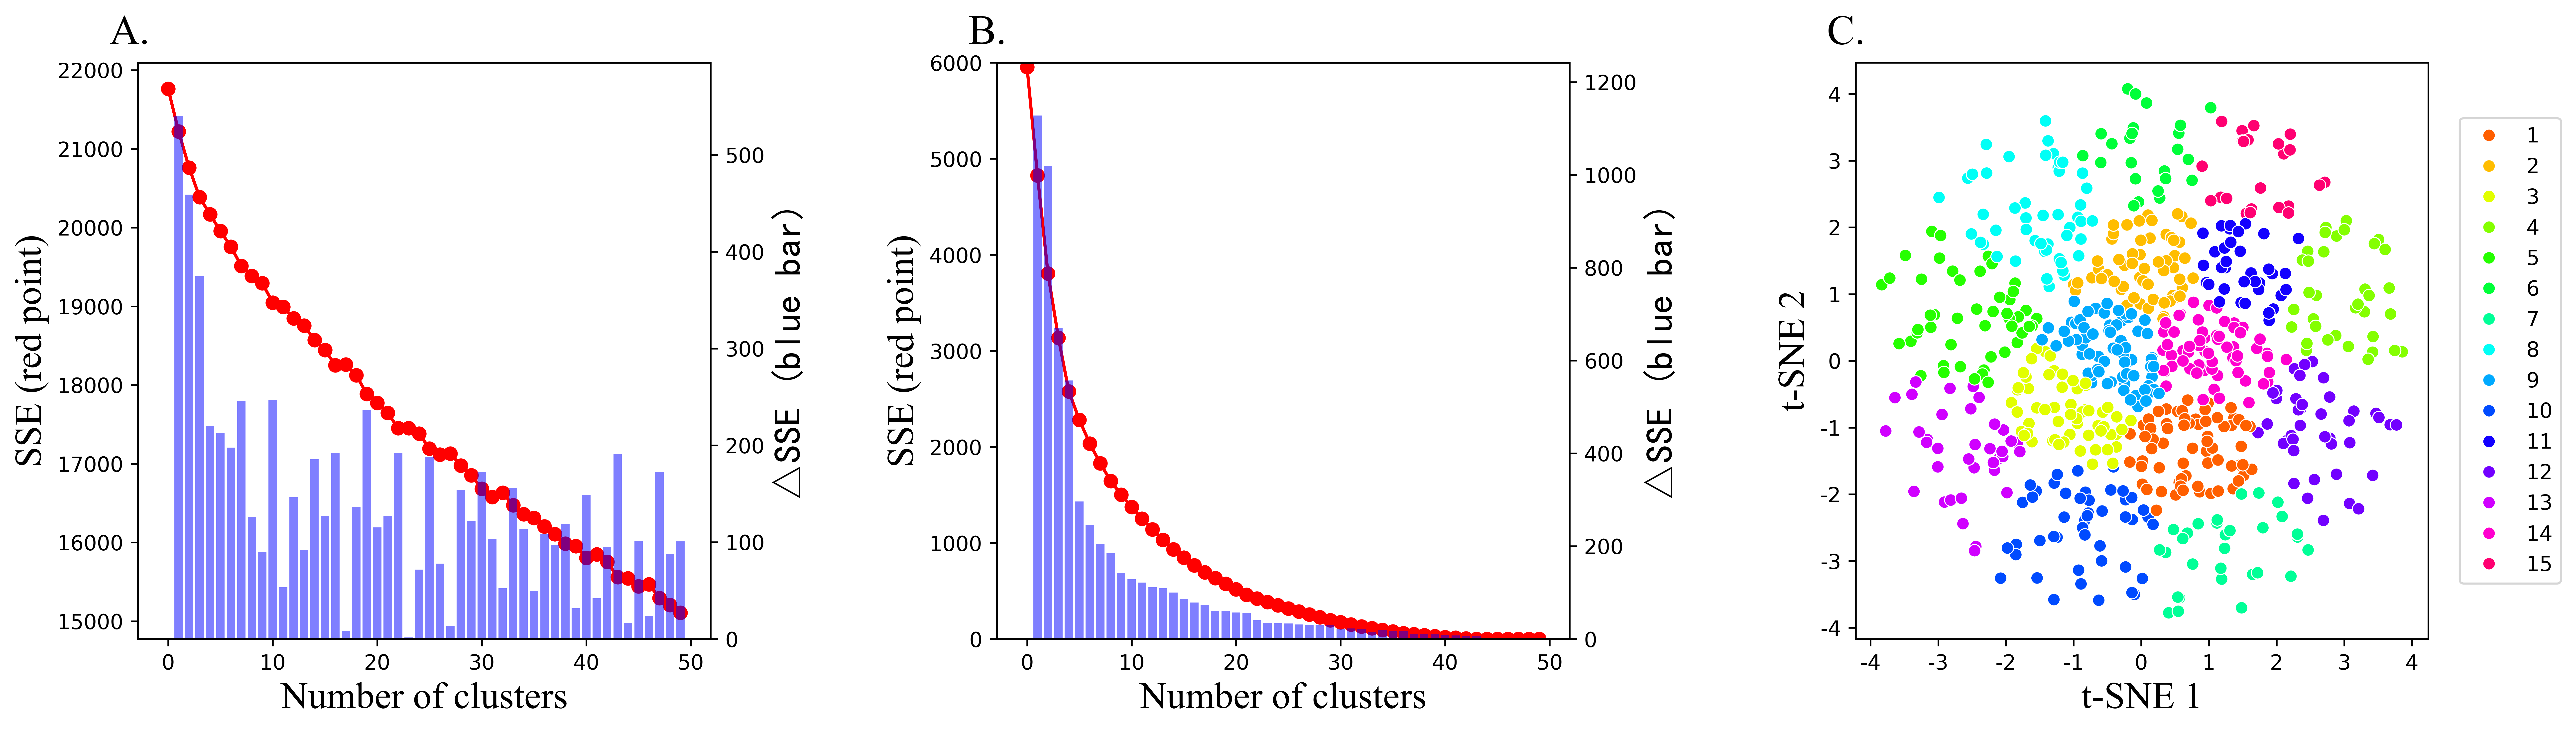

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(6*3, 5), dpi=600)
custom_labels_ = []
for i in range(15):
    custom_labels_.append(f'{i+1}')
text_location_ = (-0.05, 1.05)
draw_A(axs[0], sseA_, text_location_)
draw_B(axs[1], sseB_, text_location_)
draw_C(axs[2], fp_tsne_, text_location_, labels_, custom_labels_)
plt.subplots_adjust(
    left=0.05,
    # right=1.25,
    # bottom=0.2,
    # top=0.8,
    wspace=0.5, hspace=0.1
)
plt.savefig("./ABC.png", dpi=600)
plt.show()